In [1]:
import cv2
import os
from tensorflow.keras.preprocessing import image as tfimg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img, bgr=True, gray=False):
    plt.axis('off')
    if bgr:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        return
    if gray:
        plt.imshow(img, plt.cm.binary)
        plt.show()
        return
    plt.imshow(img)
    plt.show()

In [3]:
def hair_density(image):
    image = cv2.blur(image,(10,10))
    grayScale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    show(grayScale, False, True)
    kernel = cv2.getStructuringElement(1,(17,17))
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    show(threshold, False)
    num = cv2.countNonZero(threshold)
    size = threshold.shape[0]*threshold.shape[1]
#     show(threshold)
    return num/size

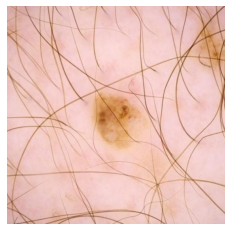

In [4]:
test_img = r'C:\Luna_CS\Melanoma 2020\---Full Validation Sets---\Hair Density\Normal\ISIC_0164145.jpg'
img = cv2.imread(test_img)
show(img)

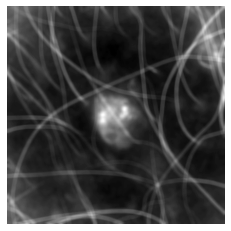

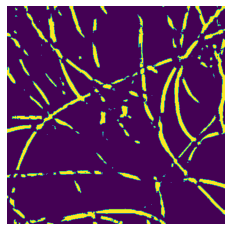

In [5]:
density = hair_density(img)

In [6]:
density

0.11891937255859375

In [7]:
path = r'C:\Luna_CS\Melanoma 2020\---Normal Validation Set---'
out_path = r'C:\Luna_CS\Melanoma 2020\---Full Validation Sets---\Hair Density\Normal'
for img in os.listdir(path):
    full_path = os.path.join(path, img)
    loaded = cv2.imread(full_path)
    density = hair_density(loaded)
    if density >= 0.1:
        out_full_path = os.path.join(out_path, img)
        cv2.imwrite(out_full_path, loaded)

In [8]:
path = r'C:\Luna_CS\Melanoma 2020\val_mel'
out_path = r'C:\Luna_CS\Melanoma 2020\---Full Validation Sets---\Hair Density\Melanoma'
for img in os.listdir(path):
    full_path = os.path.join(path, img)
    loaded = cv2.imread(full_path)
    density = hair_density(loaded)
    if density >= 0.033:
        out_full_path = os.path.join(out_path, img)
        cv2.imwrite(out_full_path, loaded)